Shortest path from Islamabad to Karachi: ['Islamabad', 'Rawalpindi', 'Quetta', 'Karachi']
Shortest path from Lahore to Peshawar: ['Lahore', 'Islamabad', 'Peshawar']


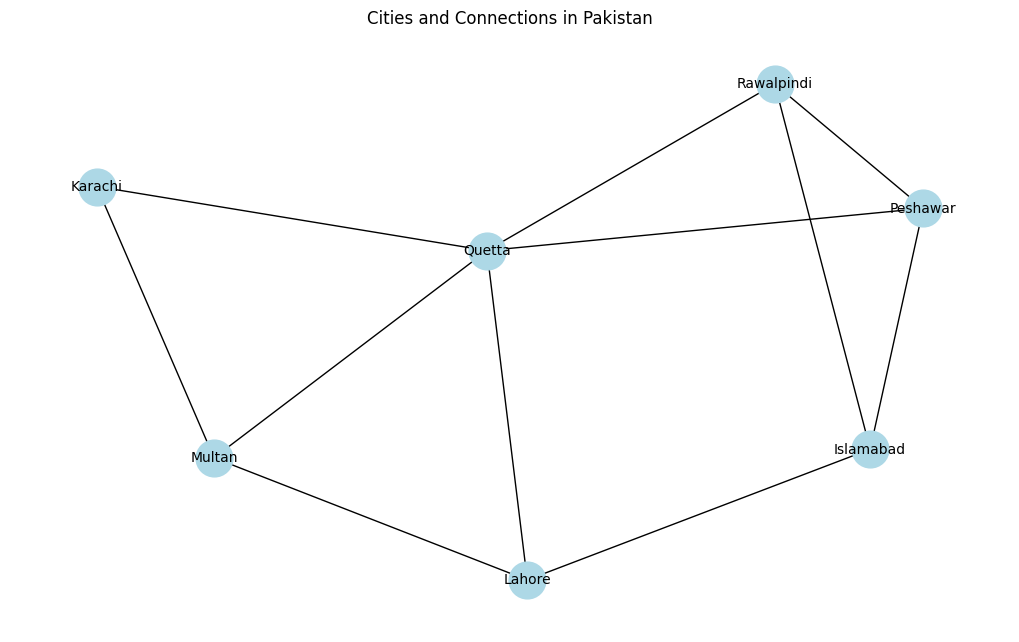

In [7]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Define the graph using a dictionary
graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Simple BFS function to find the shortest path
def bfs(graph, start, goal):
    visited = []  # Keep track of visited cities
    queue = deque([[start]])  # Queue for paths to explore

    while queue:
        path = queue.popleft()  # Get the first path from the queue
        city = path[-1]  # Get the last city in the path

        if city not in visited:
            for neighbor in graph[city]:  # Check neighbors of the city
                new_path = path + [neighbor]  # Create a new path
                if neighbor == goal:  # Check if we reached the goal
                    return new_path  # Return the path if found
                queue.append(new_path)  # Add new path to the queue

            visited.append(city)  # Mark the city as visited

    return "No path found"  # Return if no path exists

# Find shortest path from Islamabad to Karachi
shortest_path = bfs(graph, 'Islamabad', 'Karachi')
print("Shortest path from Islamabad to Karachi:", shortest_path)

# Find shortest path from Lahore to Peshawar
shortest_path_lahore = bfs(graph, 'Lahore', 'Peshawar')
print("Shortest path from Lahore to Peshawar:", shortest_path_lahore)

# Create and draw the graph
G = nx.Graph()
for city, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(city, neighbor)

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
plt.title('Cities and Connections in Pakistan')
plt.show()
